# KNN model

## Distances and Norms

### Euclidean distance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA

def euclidean_dis(a, b):
    return np.sqrt(np.sum(np.power(a-b, 2)))

### Manhattan distance

In [2]:
def manhattan_dis(a, b):
    return np.sum(np.abs(a-b))

### Accuracy and generalization error of two vectors

In [3]:
def precision_s(y_pred, y_true):
    # assuming both vectors are binary 0 or 1
    # TP: y_pred = y_true = 1
    # TN: y_pred = y_true = 0
    # FP: y_pred = 1, y_true = 0
    # FN: y_pred = 0, y_true = 1
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    tn = np.sum(((y_pred+y_true) == 0).astype(np.int))
    accuracy = (tp+tn)/y_pred.size
    gen_error = 1 - accuracy
    return accuracy, gen_error

### Precision, Recall and F1 score

In [4]:
def get_precision(y_pred, y_true):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fp = np.sum(((y_pred-y_true) == 1).astype(np.int))
    return tp/(tp+fp)

def get_recall(y_pred, y_true):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fn = np.sum(((y_true-y_pred) == 1).astype(np.int))
    return tp/(tp+fn)

def get_f1(y_pred, y_true):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fp = np.sum(((y_pred-y_true) == 1).astype(np.int))
    fn = np.sum(((y_true-y_pred) == 1).astype(np.int))
    return tp/(tp+(fn+fp)/2)

### Confusion matrix

In [5]:
def get_cm(y_true, y_pred):
    tp = np.sum(((y_pred+y_true) == 2).astype(np.int))
    fp = np.sum(((y_pred-y_true) == 1).astype(np.int))
    fn = np.sum(((y_true-y_pred) == 1).astype(np.int))
    tn = np.sum(((y_pred+y_true) == 0).astype(np.int))
    return np.array([[tn, fp], [fn, tp]])

### Receiver Operating Characteristic (ROC) curve.

In [6]:
import matplotlib.pyplot as plt
def gen_roc(y_true, y_scores):
    tpr_list = []
    fpr_list = []
    for t in range(0, 2000, 5):
        # manual threshold from 0. to 2., step 0.005
        y_test = (y_scores >= t*0.001).astype(np.int)
        tp = np.sum(((y_test+y_true) == 2).astype(np.int))
        fp = np.sum(((y_test-y_true) == 1).astype(np.int))
        fn = np.sum(((y_true-y_test) == 1).astype(np.int))
        tn = np.sum(((y_test+y_true) == 0).astype(np.int))
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fpr_list, tpr_list, color='darkorange', linewidth=8, label=None) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

### Area under curve (AUC) for the ROC curve

In [7]:
def gen_auc(y_true, y_scores):
    tpr_list = []
    fpr_list = []
    auc = 0.00
    thresholds = range(0, 200, 1)
    for t in thresholds:
        # manual threshold from 0. to 2., step 0.01
        y_test = (y_scores >= t*0.01).astype(np.int)
        tp = np.sum(((y_test+y_true) == 2).astype(np.int))
        fp = np.sum(((y_test-y_true) == 1).astype(np.int))
        fn = np.sum(((y_true-y_test) == 1).astype(np.int))
        tn = np.sum(((y_test+y_true) == 0).astype(np.int))
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # area of each small trapezoid from ROC
    for i in range(0, len(tpr_list)-1):
        # (left + right) / 2
        base = (tpr_list[i] + tpr_list[i+1]) / 2.0
        # width(or step) on fpr
        width = (fpr_list[i] - fpr_list[i+1])
        auc = auc + base * width
    return auc

### Precision recall curve

In [8]:
def gen_pr(y_true, y_scores):
    recall_list = []
    precision_list = []
    auc = 0.00
    thresholds = []
    for t in range(0, 200, 1):
        # manual threshold from 0. to 2., step 0.01
        y_test = (y_scores >= t*0.01).astype(np.int)
        tp = np.sum(((y_test+y_true) == 2).astype(np.int))
        fp = np.sum(((y_test-y_true) == 1).astype(np.int))
        fn = np.sum(((y_true-y_test) == 1).astype(np.int))
        tn = np.sum(((y_test+y_true) == 0).astype(np.int))
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        recall_list.append(recall)
        precision_list.append(precision)
        # record threshold for plotting
        thresholds.append(t*0.01)
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(10, 6))
    plt.plot(thresholds[1:], precision_list[1:], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds[1:], recall_list[1:], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    plt.xlim([0, 1])
    plt.ylim([0, 1.1])

In [9]:
def model_report(y_true, y_pred):
    tp_0 = np.sum(((y_true+y_pred) == 0).astype(np.int))
    fp_0 = np.sum(((y_true-y_pred) == 1).astype(np.int))
    fn_0 = np.sum(((y_pred-y_true) == 1).astype(np.int))
    pre_0 = tp_0 / (tp_0 + fp_0)
    rec_0 = tp_0 / (tp_0 + fn_0)
    f1_0 = tp_0 / (tp_0 + (fn_0 + fp_0) / 2)
    
    tp_1 = np.sum(((y_true+y_pred) == 2).astype(np.int))
    fp_1 = np.sum(((y_pred-y_true) == 1).astype(np.int))
    fn_1 = np.sum(((y_true-y_pred) == 1).astype(np.int))
    pre_1 = tp_1 / (tp_1 + fp_1)
    rec_1 = tp_1 / (tp_1 + fn_1)
    f1_1 = tp_1 / (tp_1 + (fn_1 + fp_1) / 2)
    
    sum_1 = tp_1 + fp_1
    sum_0 = tp_0 + fp_0
    
    print("%12s %12s %12s %12s %12s" % ("", "precision", "recall", "f1-score", "support"))
    print("%12d %12.3f %12.3f %12.3f %12d" % (0, pre_0, rec_0, f1_0, sum_0))
    print("%12d %12.3f %12.3f %12.3f %12d" % (1, pre_1, rec_1, f1_1, sum_1))
    print("%12s %12.3f %12.3f %12.3f %12d" % ("avg / total", (pre_0+pre_1)/2., (rec_1+rec_0)/2., (f1_1+f1_0)/2., (sum_1+sum_0)))

### kNN class model (with inverse distance option)

In [10]:
class KNN:
    def __init__(self):
        pass
    
    def fit(self, training_features, training_labels, k, distance_f, **kwargs):
        self.training_features = training_features
        self.training_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        # depending on what's passed in the kwargs, 
        # we can modify the distance function later
        self.distance_f_args = kwargs
    
    def predict(self, test_features, inverse_distance=False):
        classification = np.array([])
        y_prob = np.array([])
        # classification needs to be done for each row 
        # of data in the test_features
        for i_test in range(len(test_features)):
            scoring = []
            labels = {}
            # calculate distances with every row in training features
            for i_train in range(len(self.training_features)):
                d = self.distance_f(test_features[i_test], self.training_features[i_train])
                c = self.training_labels[i_train]
                scoring.append([d, c])
            # sort by least distance
            scoring.sort()
            # only keep the top k values
            scoring = scoring[0:self.k]
            total_weight = 0
            # if inverse_distance is not true, weight is 1
            for s in scoring:
                weight = 1
                if inverse_distance:
                    # weight = 1/distance
                    distance = s[0]
                    if s[0]==0:
                        distance = 0.0001
                    weight = (1.0/distance)
                if s[1] in labels:
                    labels[s[1]] += weight
                else:
                    labels[s[1]] = weight
                total_weight += weight
            best_fit = None
            confidence_0 = 0.0
            confidence_1 = 0.0
            best_wt = 0.0
            # go through the labels to find one with best weight
            for lab, wt in labels.items():
                if wt > best_wt:
                    best_wt = wt
                    best_fit = lab
                    if best_fit == 0:
                        confidence_0 = wt/total_weight
                        confidence_1 = 1-(wt/total_weight)
                    else:
                        confidence_1 = wt/total_weight
                        confidence_0 = 1-(wt/total_weight)
            # add the classification to final numpy array
            classification = np.append(classification, [best_fit])
            y_prob = np.append(y_prob, [confidence_1])
        self.y_scores = y_prob
        return classification   

# Data Processing

In [11]:
df = pd.read_csv('./datasets/winequality-white.csv', sep=";")

# shuffle the dataset
df = df.sample(frac=1)

print(df['quality'].head())

# change the reformat the quality data into binary
def wine_quality(x):
    if x > 5.0:
        return 1
    return 0
df['quality'] = df['quality'].apply(lambda x: wine_quality(x))

# check again
print(df['quality'].head())

# dataset summary
df.describe()

3537    5
1026    6
4441    6
4211    6
2671    7
Name: quality, dtype: int64
3537    0
1026    1
4441    1
4211    1
2671    1
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


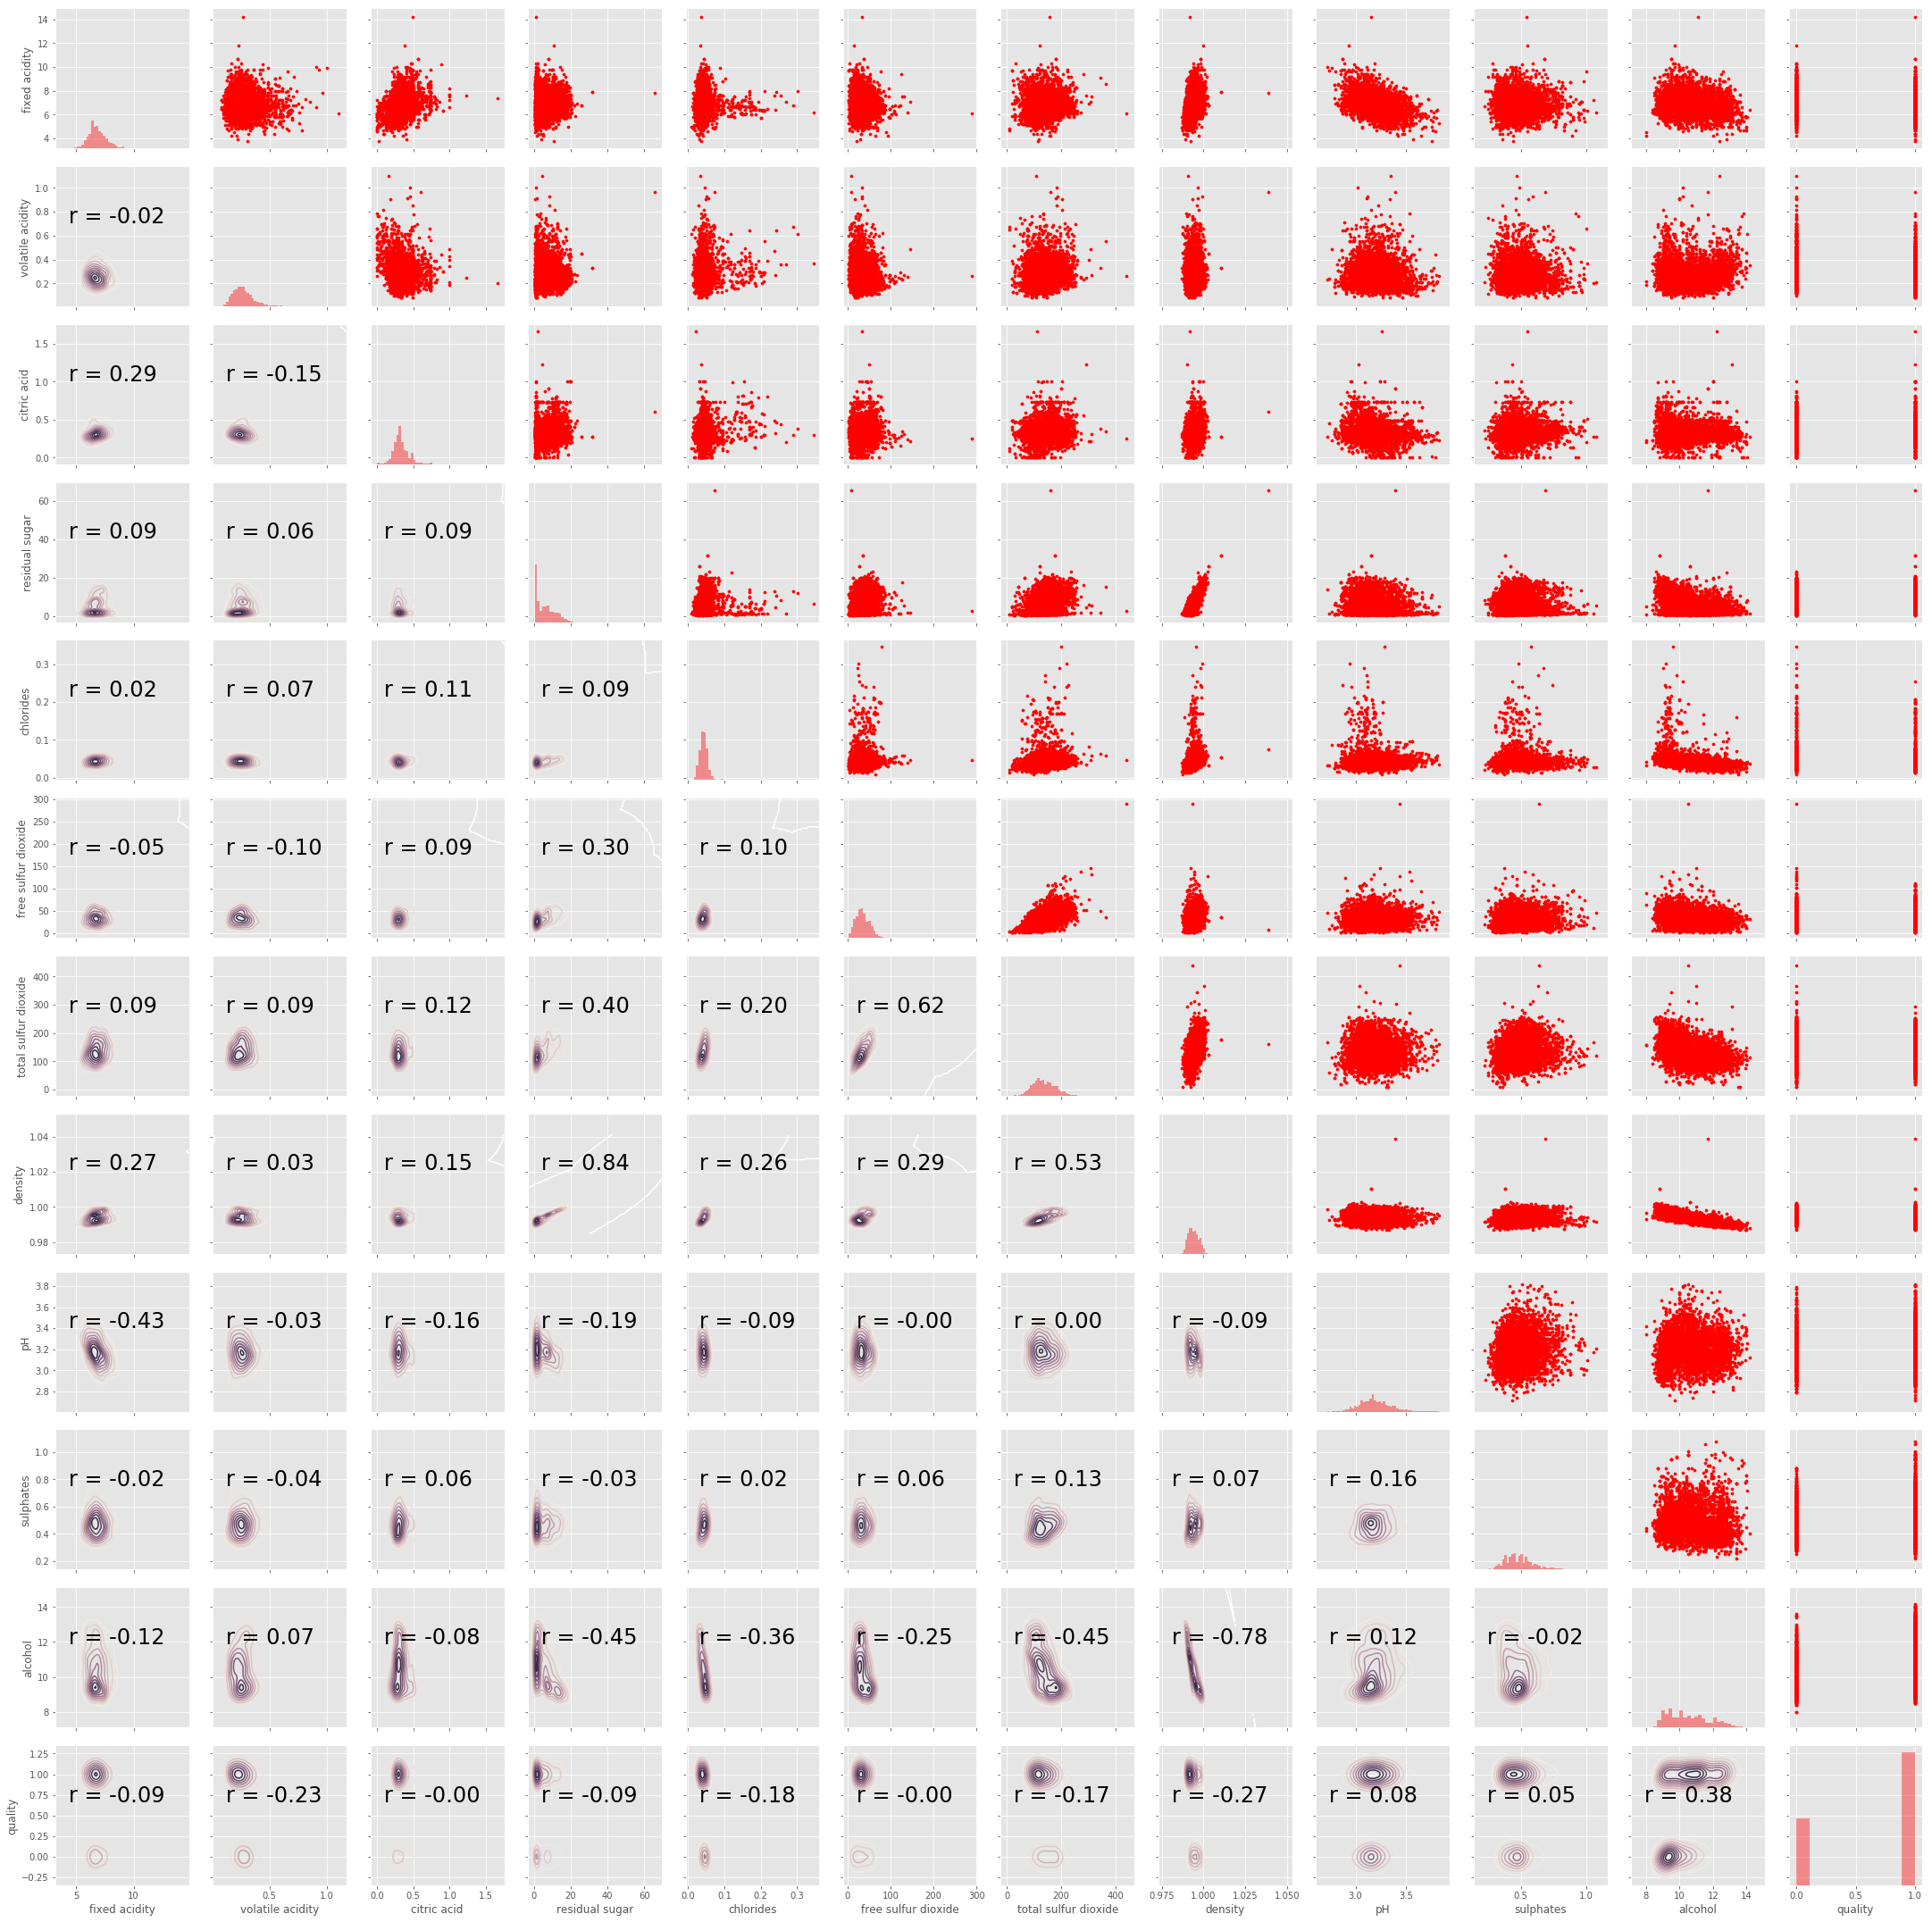

In [121]:
# plot to identify redundent features
import seaborn as sns
from scipy import stats
%matplotlib inline

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1, hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [12]:
# We are removing 'residual sugar' and 'alcohol' because 'density' is highly correlated with these two
# We are also removing 'citric acid', 'free sulphur dioxide' and 'sulphates' because of low co-relation
    # with the 'quality' of wine

df = df[['fixed acidity','volatile acidity','chlorides','total sulfur dioxide','density','pH','quality']]

In [13]:
# partition function generate X_train, X_test, y_train, y_test
def partition(feature_arr, target_arr, t=0.2):
    nrows = int(np.floor((1-t) * feature_arr.shape[0]))
    X_train, X_test  = feature_arr[:nrows], feature_arr[nrows:]
    y_train, y_test = target_arr[:nrows], target_arr[nrows:]
    return X_train, X_test, y_train, y_test

In [14]:
# prepare testing and training datasets 
features = df.loc[:, df.columns != 'quality'].values
target = df['quality'].values
X_train, X_test, y_train, y_test = partition(features, target)

In [15]:
knn = KNN()
knn.fit(X_train, y_train, 5, euclidean_dis)

Eucledian, standard
f1 score:  0.7759882869692533
precision:  0.7475317348377997
recall:  0.806697108066971


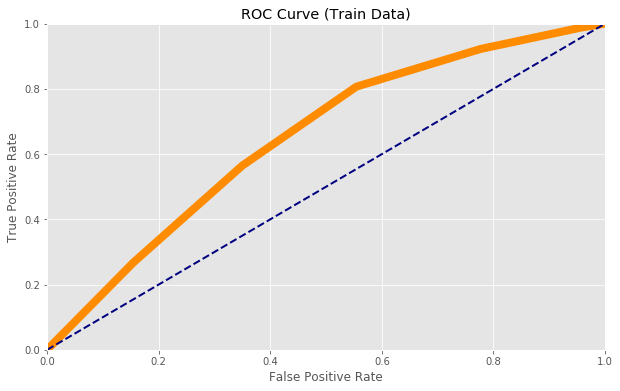

In [16]:
y_predicted_1 = knn.predict(X_test)

print("Eucledian, standard")
print("f1 score: ", get_f1(y_predicted_1, y_test))
print("precision: ", get_precision(y_predicted_1, y_test)) 
print("recall: ", get_recall(y_predicted_1, y_test))

gen_roc(y_true = y_test, y_scores = knn.y_scores)


Eucledian, inverse weighted
f1 score:  0.827790096082779
precision:  0.8034433285509326
recall:  0.8536585365853658


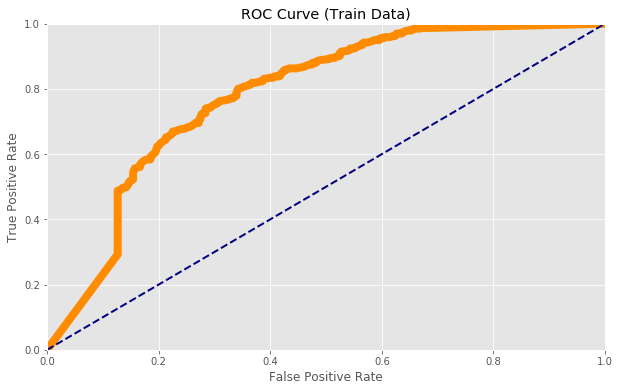

In [16]:
y_predicted_2 = knn.predict(X_test, True)

print("\nEucledian, inverse weighted")
print("f1 score: ", get_f1(y_predicted_2, y_test))
print("precision: ", get_precision(y_predicted_2, y_test)) 
print("recall: ", get_recall(y_predicted_2, y_test))

gen_roc(y_true = y_test, y_scores = knn.y_scores)

In [17]:
print("AUC", gen_auc(y_true = y_test, y_scores = knn.y_scores))

AUC 0.782056891749473


In [21]:
# standardize data
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

X_train_std = (X_train - mean_train) / std_train

# use mean/std  of training set to scale test
X_test_std = (X_test - mean_train) / std_train

Eucledian, standard, standardized data
f1 score:  0.8299625468164794
precision:  0.8159057437407953
recall:  0.8445121951219512


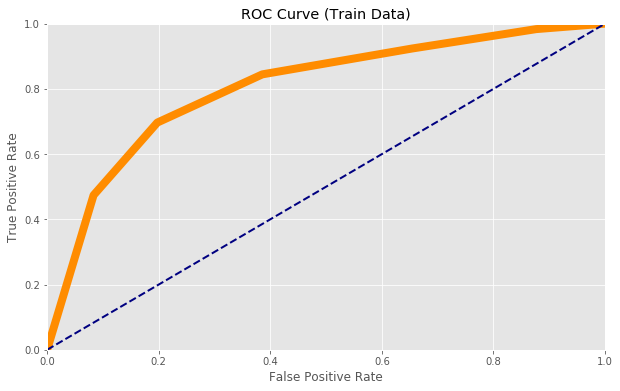

In [22]:
knn = KNN()
knn.fit(X_train_std, y_train, 5, euclidean_dis)
y_predicted_std = knn.predict(X_test_std)

print("Eucledian, standard, standardized data")
print("f1 score: ", get_f1(y_predicted_std, y_test))
print("precision: ", get_precision(y_predicted_std, y_test)) 
print("recall: ", get_recall(y_predicted_std, y_test))

gen_roc(y_true = y_test, y_scores = knn.y_scores)

Eucledian, inverse, standardized data
f1 score:  0.8662704309063893
precision:  0.8449275362318841
recall:  0.8887195121951219


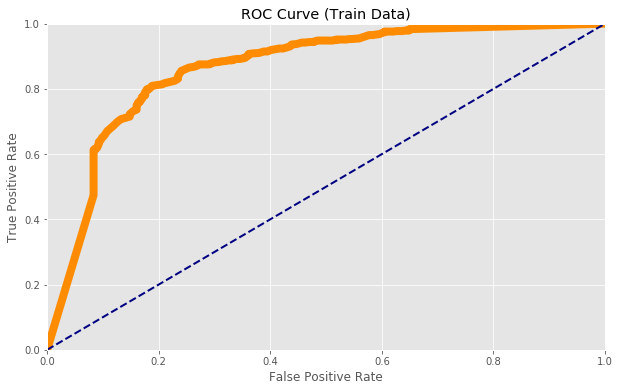

In [23]:
y_predicted_std_inv = knn.predict(X_test_std, True)

print("Eucledian, inverse, standardized data")
print("f1 score: ", get_f1(y_predicted_std_inv, y_test))
print("precision: ", get_precision(y_predicted_std_inv, y_test)) 
print("recall: ", get_recall(y_predicted_std_inv, y_test))

gen_roc(y_true = y_test, y_scores = knn.y_scores)

### Looks like the standarized dataset without the inverse distance seems to give the best value for k=5

In [24]:
print("AUC", gen_auc(y_true = y_test, y_scores = knn.y_scores))

AUC 0.8637435072267391


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


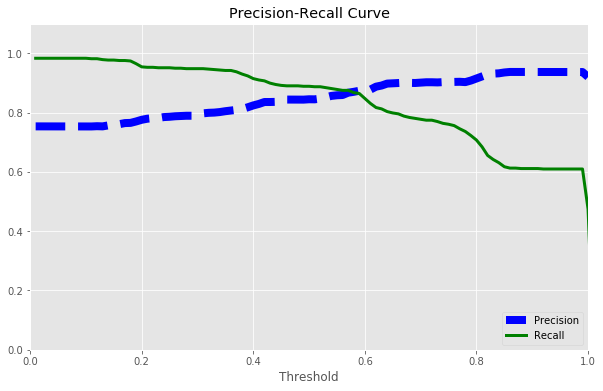

In [25]:
gen_pr(y_true = y_test, y_scores = knn.y_scores)

# Model Evaluation

### S-fold cross-validation function

In [19]:
def sFold(folds, data, labels, model, model_args, error_function):
    error = []
    nrows = data.shape[0]
    # we divide the dataset in equal parts. If there are extra rows, we ignore them
    f_size = int(np.floor(nrows/folds))
    data, labels = data[0:(f_size * folds)], labels[0:(f_size * folds)]
    data, labels = np.split(data, folds), np.split(labels, folds)

    expected_labels = np.ndarray([])
    predicted_labels = np.ndarray([])
    
    for fold in range(folds):
        test_created = False
        for i in range(folds):
            if fold == i:
                X_test = data[i]
                y_test = labels[i]
                test_created = True
            else:
                if i==0 or (i == 1 and test_created):
                    X_train = data[i]
                    y_train = labels[i]
                else:
                    X_train = np.append(X_train, data[i], axis=0)
                    y_train = np.append(y_train, labels[i], axis=0)
        # test and train sets have been created
        
        # check if scale is True
        if 'scale' in model_args and model_args['scale']:
            mean_train = np.mean(X_train, axis=0)
            std_train = np.std(X_train, axis=0)
            X_train = (X_train - mean_train) / std_train
            # use mean/std  of training set to scale test
            X_test = (X_test - mean_train) / std_train
        knn = model()
        knn.fit(X_train, y_train, model_args['k'], model_args['distance_f'])
        y_predicted = knn.predict(X_test, model_args['inverse_distance'])
        
        expected_labels = np.append(expected_labels, y_test)
        predicted_labels = np.append(predicted_labels, y_predicted)
        error.append(error_function(y_predicted, y_test))
        
    return {'expected_labels': expected_labels, 'predicted_labels': predicted_labels, 'average_error': np.mean(error)}


### S-Fold evaluation for various k values, and distance metrics

In [20]:
features = df.loc[:, df.columns != 'quality'].values
target = df['quality'].values

In [22]:
evaluation_results = []
col_names =  ['k', 'Distance Metric', 'Inverse Distance', 'Average F1 Score']
model_evaluation = pd.DataFrame(columns=col_names)

for k in [1, 5, 9, 11]:
    sFold_analysis_euc = sFold(8, features, target, KNN, {'k': k, 'distance_f': euclidean_dis, 'inverse_distance': True, 'scale': True}, get_f1)
    sFold_analysis_man = sFold(8, features, target, KNN, {'k': k, 'distance_f': manhattan_dis, 'inverse_distance': True, 'scale': True}, get_f1)
    evaluation_results.append({k: [sFold_analysis_euc, sFold_analysis_man]})
    
    tempDF = pd.DataFrame([[k, 'Euclidean', 'True', sFold_analysis_euc['average_error']]], columns = col_names)
    model_evaluation = model_evaluation.append(tempDF, ignore_index = True)
    
    tempDF = pd.DataFrame([[k, 'Manhattan', 'True', sFold_analysis_man['average_error']]], columns = col_names)
    model_evaluation = model_evaluation.append(tempDF, ignore_index = True)

In [23]:
evaluation_results2 = []
for k in [1, 5, 9, 11]:
    sFold_analysis_euc2 = sFold(8, features, target, KNN, {'k': k, 'distance_f': euclidean_dis, 'inverse_distance': False, 'scale': True }, get_f1)
    sFold_analysis_man2 = sFold(8, features, target, KNN, {'k': k, 'distance_f': manhattan_dis, 'inverse_distance': False, 'scale': True }, get_f1)
    evaluation_results2.append({k: [sFold_analysis_euc2, sFold_analysis_man2]})
    
    tempDF = pd.DataFrame([[k, 'Euclidean', 'False', sFold_analysis_euc2['average_error']]], columns = col_names)
    model_evaluation = model_evaluation.append(tempDF, ignore_index = True)
    
    tempDF = pd.DataFrame([[k, 'Manhattan', 'False', sFold_analysis_man2['average_error']]], columns = col_names)
    model_evaluation = model_evaluation.append(tempDF, ignore_index = True)

model_evaluation

,k,Distance Metric,Inverse Distance,Average F1 Score
0,1,Euclidean,True,0.849525
1,1,Manhattan,True,0.845120
2,5,Euclidean,True,0.859141
3,5,Manhattan,True,0.856290
4,9,Euclidean,True,0.860052
5,9,Manhattan,True,0.861485
6,11,Euclidean,True,0.859798
7,11,Manhattan,True,0.863303
8,1,Euclidean,False,0.849525
9,1,Manhattan,False,0.845120


### Performance measures on test data

In [ ]:
sFold_analysis_euc = sFold(8, features, target, KNN, {'k': 9, 'distance_f': euclidean_dis, 'inverse_distance': True, 'scale': True}, get_f1)
sFold_analysis_man = sFold(8, features, target, KNN, {'k': 9, 'distance_f': manhattan_dis, 'inverse_distance': True, 'scale': True}, get_f1)

In [30]:
y_seuc_true = sFold_analysis_euc['expected_labels']
y_seuc_pred = sFold_analysis_euc['predicted_labels']
# print(y_seuc_true.shape)
print("Eucledian, standard")
print("f1 score: ", get_f1(y_seuc_pred, y_seuc_true))
print("precision: ", get_precision(y_seuc_pred, y_seuc_true)) 
print("recall: ", get_recall(y_seuc_pred, y_seuc_true))
print("confusion matrix:\n", get_cm(y_seuc_pred, y_seuc_true))

y_man_true = sFold_analysis_man['expected_labels']
y_man_pred = sFold_analysis_man['predicted_labels']
print("\nManhattan, standard")
print("f1 score: ", get_f1(y_man_pred, y_man_true))
print("precision: ", get_precision(y_man_pred, y_man_true))
print("recall: ", get_recall(y_man_pred, y_man_true))
print("confusion matrix:\n", get_cm(y_man_pred, y_man_true))

Eucledian, standard
f1 score:  0.8675200952664484
precision:  0.8419531927188674
recall:  0.894688363524716
confusion matrix:
 [[1092  343]
 [ 547 2914]]

Manhattan, standard
f1 score:  0.8685543964232488
precision:  0.8439038517231393
recall:  0.894688363524716
confusion matrix:
 [[1100  343]
 [ 539 2914]]


### 95% confidence interval on the generalization error estimate

In [23]:
accuracy, gen_error = precision_s(y_true= y_seuc_true, y_pred = y_seuc_pred)
confusion = get_cm(y_pred=y_seuc_pred, y_true=y_seuc_true)
lower_ac = accuracy - 1.96 * np.sqrt(accuracy * (1 - accuracy) / y_seuc_true.shape[0])
upper_ac = accuracy + 1.96 * np.sqrt(accuracy * (1 - accuracy) / y_seuc_true.shape[0])
lower_er = gen_error - 1.96 * np.sqrt(gen_error * (1 - gen_error) / y_seuc_true.shape[0])
upper_er = gen_error + 1.96 * np.sqrt(gen_error * (1 - gen_error) / y_seuc_true.shape[0])
print('Accuracy: {:.3f} with confidence interval: {:.3f} - {:.3f}'.format(accuracy, lower_ac, upper_ac))
print('95% Error Confidence Interval: {:.3f} - {:.3f}'.format(lower_er, upper_er))

Accuracy: 0.818 with confidence interval: 0.807 - 0.829
95% Error Confidence Interval: 0.171 - 0.193


In [31]:
model_report(y_seuc_true, y_seuc_pred)

                precision       recall     f1-score      support
           0        0.761        0.666        0.710         1435
           1        0.842        0.895        0.868         3461
 avg / total        0.801        0.780        0.789         4896


In [33]:
model_report(y_man_true, y_man_pred)

                precision       recall     f1-score      support
           0        0.762        0.671        0.714         1443
           1        0.844        0.895        0.869         3453
 avg / total        0.803        0.783        0.791         4896
